<html> <h1 style="font-style:bold; color:blue;"> Machine Learning in Finance </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> Financial Data Preprocessing </h2> </html>

### Financial data of GOLD during 2022

### High & Low prices are outputs
- Data preprocessing done
- Spreads of all prices (Open, High, Low, Close) between Ask and Bid are calculated
- Delta of trading volumes (as well as the modulus of this delta) between Ask and Bid volumes
are introduced as additional parameters
 - Starts of each trading day and each trading week are marked


- normalization parameters are calculated only for the training part (80%) of the Dataset (so as not to peep into the future)

#### Number of rows
- 354.694 rows



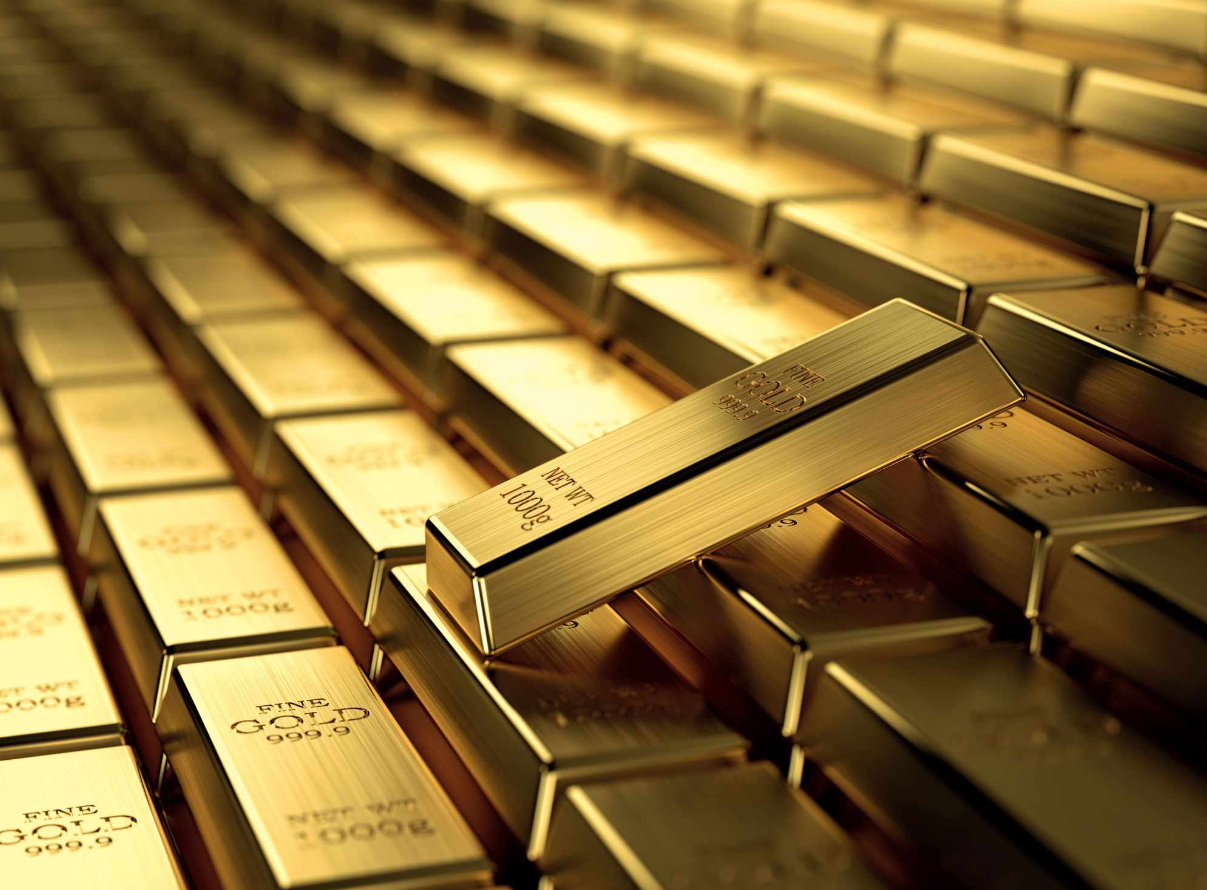

In [1]:
# Please run the next 4 cells. 
# After each cell completed, please restart the Kernel

# It is needed to run only one time for the computer

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


___________________________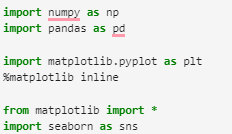

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import *
import seaborn as sns

_____________________________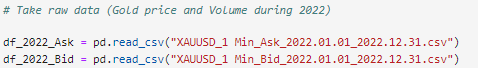

In [7]:
df_2022_Ask = pd.read_csv("XAUUSD_1 Min_Ask_2022.01.01_2022.12.31.csv")
df_2022_Bid = pd.read_csv("XAUUSD_1 Min_Bid_2022.01.01_2022.12.31.csv")

________________________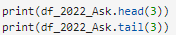

In [8]:
print(df_2022_Ask.head(3))
print(df_2022_Ask.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2022.01.02 23:00:00  1829.656  1830.936  1829.386  1830.196  0.02454
1  2022.01.02 23:01:00  1829.936  1830.676  1829.916  1830.632  0.02697
2  2022.01.02 23:02:00  1830.612  1831.226  1830.516  1831.146  0.04489
                 Time (UTC)      Open      High       Low     Close  Volume 
354691  2022.12.30 21:56:00  1824.505  1824.675  1824.252  1824.452  0.00782
354692  2022.12.30 21:57:00  1824.452  1824.452  1823.852  1823.852  0.00405
354693  2022.12.30 21:58:00  1823.955  1824.252  1823.852  1824.252  0.00242


_____________________

In [9]:
print(df_2022_Bid.head(3))
print(df_2022_Bid.tail(3))

            Time (UTC)      Open      High       Low     Close  Volume 
0  2022.01.02 23:00:00  1828.604  1829.628  1828.544  1829.504  0.02635
1  2022.01.02 23:01:00  1829.504  1830.104  1829.398  1830.004  0.01939
2  2022.01.02 23:02:00  1830.098  1830.604  1829.998  1830.534  0.03017
                 Time (UTC)      Open      High       Low     Close  Volume 
354691  2022.12.30 21:56:00  1823.948  1824.090  1823.347  1823.848  0.00837
354692  2022.12.30 21:57:00  1823.748  1823.748  1823.023  1823.025  0.01078
354693  2022.12.30 21:58:00  1823.448  1823.463  1823.006  1823.463  0.01785


In [10]:
# rows numbers and 'Time (UTC)' are the same in the rows with the same indices for Ask and Bid datasets

___________________________

In [11]:
df_2022_Ask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354694 entries, 0 to 354693
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  354694 non-null  object 
 1   Open        354694 non-null  float64
 2   High        354694 non-null  float64
 3   Low         354694 non-null  float64
 4   Close       354694 non-null  float64
 5   Volume      354694 non-null  float64
dtypes: float64(5), object(1)
memory usage: 16.2+ MB


________________________

In [12]:
df_2022_Bid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354694 entries, 0 to 354693
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  354694 non-null  object 
 1   Open        354694 non-null  float64
 2   High        354694 non-null  float64
 3   Low         354694 non-null  float64
 4   Close       354694 non-null  float64
 5   Volume      354694 non-null  float64
dtypes: float64(5), object(1)
memory usage: 16.2+ MB


<html> <h3 style="font-style:italic; color:blue;"> Merge DataFrame </h3> </html>

In [13]:
#df_2022_Bid.merge?

________________________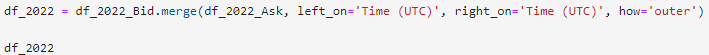

In [14]:
df_2022 = df_2022_Bid.merge(df_2022_Ask, left_on='Time (UTC)', right_on='Time (UTC)', how='outer')

df_2022

,Time (UTC),Open_x,High_x,Low_x,Close_x,Volume _x,Open_y,High_y,Low_y,Close_y,Volume _y
0,2022.01.02 23:00:00,1828.604,1829.628,1828.544,1829.504,0.02635,1829.656,1830.936,1829.386,1830.196,0.02454
1,2022.01.02 23:01:00,1829.504,1830.104,1829.398,1830.004,0.01939,1829.936,1830.676,1829.916,1830.632,0.02697
2,2022.01.02 23:02:00,1830.098,1830.604,1829.998,1830.534,0.03017,1830.612,1831.226,1830.516,1831.146,0.04489
3,2022.01.02 23:03:00,1830.534,1830.704,1830.504,1830.674,0.00540,1831.156,1831.306,1831.046,1831.046,0.01846
4,2022.01.02 23:04:00,1830.674,1830.674,1830.448,1830.508,0.01806,1831.026,1831.181,1830.886,1831.086,0.02912
...,...,...,...,...,...,...,...,...,...,...,...
354689,2022.12.30 21:54:00,1824.248,1824.348,1824.148,1824.248,0.00532,1824.852,1825.052,1824.752,1824.852,0.00382
354690,2022.12.30 21:55:00,1824.148,1824.148,1823.737,1823.948,0.00597,1824.752,1824.752,1824.552,1824.552,0.00316
354691,2022.12.30 21:56:00,1823.948,1824.090,1823.347,1823.848,0.00837,1824.505,1824.675,1824.252,1824.452,0.00782
354692,2022.12.30 21:57:00,1823.748,1823.748,1823.023,1823.025,0.01078,1824.452,1824.452,1823.852,1823.852,0.00405


______________________________

In [15]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354694 entries, 0 to 354693
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Time (UTC)  354694 non-null  object 
 1   Open_x      354694 non-null  float64
 2   High_x      354694 non-null  float64
 3   Low_x       354694 non-null  float64
 4   Close_x     354694 non-null  float64
 5   Volume _x   354694 non-null  float64
 6   Open_y      354694 non-null  float64
 7   High_y      354694 non-null  float64
 8   Low_y       354694 non-null  float64
 9   Close_y     354694 non-null  float64
 10  Volume _y   354694 non-null  float64
dtypes: float64(10), object(1)
memory usage: 29.8+ MB


In [16]:
# No NaN elements ! It's Good !

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [17]:
# rename columns

df_2022.columns = ['Local time', 'Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 
                   'Open_Ask', 'High_Ask', 'Low_Ask', 'Close_Ask', 'Volume_Ask']

____________________________

In [18]:
df_2022.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask
0,2022.01.02 23:00:00,1828.604,1829.628,1828.544,1829.504,0.02635,1829.656,1830.936,1829.386,1830.196,0.02454
1,2022.01.02 23:01:00,1829.504,1830.104,1829.398,1830.004,0.01939,1829.936,1830.676,1829.916,1830.632,0.02697
2,2022.01.02 23:02:00,1830.098,1830.604,1829.998,1830.534,0.03017,1830.612,1831.226,1830.516,1831.146,0.04489


In [19]:
# Save preliminary dataset

________________________________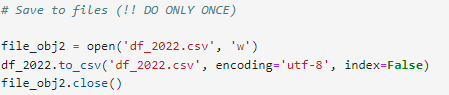

In [20]:
#Done!
#file_obj2 = open('df_2022.csv', 'w')
#df_2022.to_csv('df_2022.csv', encoding='utf-8', index=False)
#file_obj2.close()

In [21]:
# Please find the df_2022.csv file in your folder

___________________________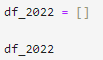

In [22]:
df_2022 = []
df_2022

[]

#### Upload the preliminary dataset

_______________________

In [23]:
df = pd.read_csv('df_2022.csv', low_memory=False, sep=',')

#### Now just press 'CTRL' and 'ENTER' keys on the next 2 cells.

In [24]:
# Delta of trading volumes (as well as the modulus of this delta) between Ask 
# and Bid volumes are added as additional parameters

df["Volume_Delta"] = df["Volume_Ask"] - df["Volume_Bid"]
df["Volume_Delta_abs"] = (df["Volume_Ask"] - df["Volume_Bid"]).abs()

In [25]:
df["Open_Delta"] = df["Open_Ask"]  - df["Open_Bid"]
df["High_Delta"] = df["High_Ask"]  - df["High_Bid"]
df["Low_Delta"]  = df["Low_Ask"]   - df["Low_Bid"]
df["Close_Delta"]= df["Close_Ask"] - df["Close_Bid"]

___________________________

In [26]:
df.describe()

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Open_Ask,High_Ask,Low_Ask,Close_Ask,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
count,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.00000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000,354694.000000
mean,1801.307680,1801.586867,1801.030075,1801.307653,0.036976,1801.68135,1801.959366,1801.402610,1801.681631,0.036858,-0.000118,0.009938,0.373670,0.372500,0.372535,0.373978
std,91.694694,91.725905,91.661343,91.693632,0.032551,91.69527,91.726276,91.662139,91.696022,0.032325,0.019674,0.016980,0.078212,0.072615,0.072010,0.072828
min,1614.858000,1615.848000,1614.710000,1614.858000,0.000000,1615.25200,1616.172000,1615.092000,1615.245000,0.000000,-2.553020,0.000000,0.005000,0.001000,0.002000,0.005000
25%,1734.037250,1734.294000,1733.789500,1734.034000,0.015720,1734.40200,1734.662000,1734.152750,1734.402000,0.015720,-0.005630,0.002000,0.327000,0.327000,0.327000,0.328000
50%,1804.495500,1804.728000,1804.248000,1804.491500,0.028740,1804.84200,1805.075000,1804.595000,1804.842500,0.028620,0.000000,0.005530,0.367000,0.364000,0.365000,0.368000
75%,1855.088000,1855.348000,1854.847000,1855.086250,0.048420,1855.44200,1855.702000,1855.202000,1855.442000,0.048240,0.005420,0.012610,0.414000,0.414000,0.414000,0.414000
max,2069.368000,2070.358000,2066.518000,2069.358000,2.711570,2069.81200,2070.778000,2067.052000,2069.802000,1.571650,1.502610,2.553020,2.184000,3.026000,3.086000,4.236000


____________________________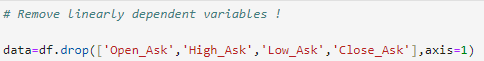

In [27]:
data=df.drop(['Open_Ask', 'High_Ask','Low_Ask','Close_Ask'],axis=1)

__________________________

In [28]:
data.shape

(354694, 13)

_________________________

In [29]:
data.head(3)

,Local time,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta
0,2022.01.02 23:00:00,1828.604,1829.628,1828.544,1829.504,0.02635,0.02454,-0.00181,0.00181,1.052,1.308,0.842,0.692
1,2022.01.02 23:01:00,1829.504,1830.104,1829.398,1830.004,0.01939,0.02697,0.00758,0.00758,0.432,0.572,0.518,0.628
2,2022.01.02 23:02:00,1830.098,1830.604,1829.998,1830.534,0.03017,0.04489,0.01472,0.01472,0.514,0.622,0.518,0.612


<html> <h3 style="font-style:italic; color:blue;"> Date transformation </h3> </html>

______________________

In [30]:
import datetime

_________________________

In [31]:
data['Local_time_T'] = pd.to_datetime(data['Local time'], utc=True)

________________________

In [32]:
data=data.drop(['Local time'],axis=1)

________________________

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354694 entries, 0 to 354693
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Open_Bid          354694 non-null  float64            
 1   High_Bid          354694 non-null  float64            
 2   Low_Bid           354694 non-null  float64            
 3   Close_Bid         354694 non-null  float64            
 4   Volume_Bid        354694 non-null  float64            
 5   Volume_Ask        354694 non-null  float64            
 6   Volume_Delta      354694 non-null  float64            
 7   Volume_Delta_abs  354694 non-null  float64            
 8   Open_Delta        354694 non-null  float64            
 9   High_Delta        354694 non-null  float64            
 10  Low_Delta         354694 non-null  float64            
 11  Close_Delta       354694 non-null  float64            
 12  Local_time_T      354694 non-null  datetime6

____________________________

In [34]:
data.head(3)

,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,Volume_Ask,Volume_Delta,Volume_Delta_abs,Open_Delta,High_Delta,Low_Delta,Close_Delta,Local_time_T
0,1828.604,1829.628,1828.544,1829.504,0.02635,0.02454,-0.00181,0.00181,1.052,1.308,0.842,0.692,2022-01-02 23:00:00+00:00
1,1829.504,1830.104,1829.398,1830.004,0.01939,0.02697,0.00758,0.00758,0.432,0.572,0.518,0.628,2022-01-02 23:01:00+00:00
2,1830.098,1830.604,1829.998,1830.534,0.03017,0.04489,0.01472,0.01472,0.514,0.622,0.518,0.612,2022-01-02 23:02:00+00:00


<html> <h3 style="font-style:italic; color:blue;"> Data Visualisation </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

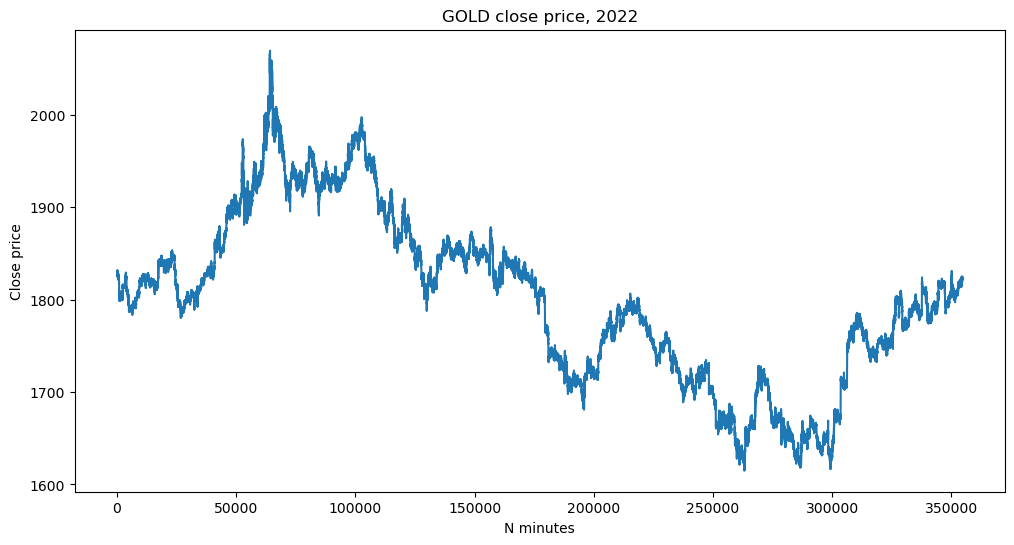

In [35]:
plt.figure(figsize=(12,6))
plt.plot(data['Close_Bid'])
plt.title('GOLD close price, 2022')
plt.xlabel('N minutes')
plt.ylabel('Close price')
plt.show()

#### Candlestick chart for 70 minutes 

_____________________________

In [36]:
data_chart = data.set_index('Local_time_T', inplace=False)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [37]:
data_chart = data_chart.drop(['Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                        'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta'],axis=1)

____________________________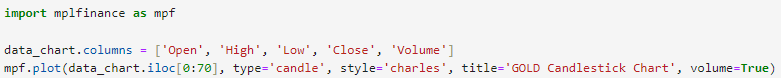

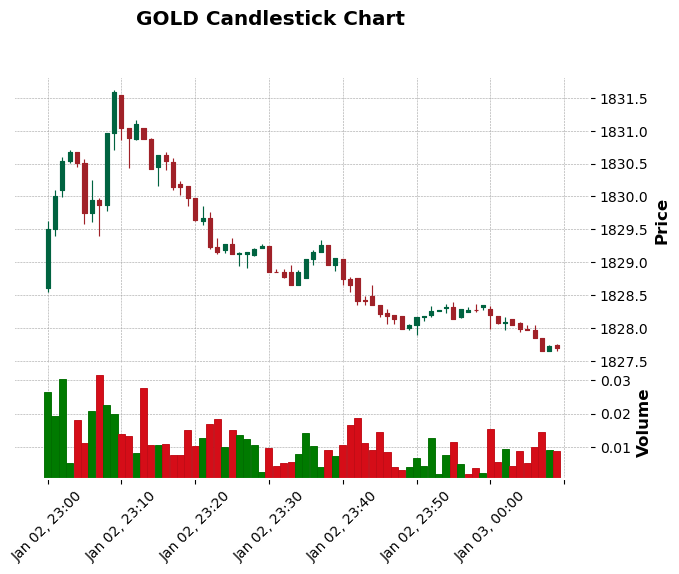

In [38]:
import mplfinance as mpf

data_chart.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(data_chart.iloc[0:70], type='candle', style='charles', title='GOLD Candlestick Chart', volume=True)

_______________________________________

In [39]:
data_chart = []

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

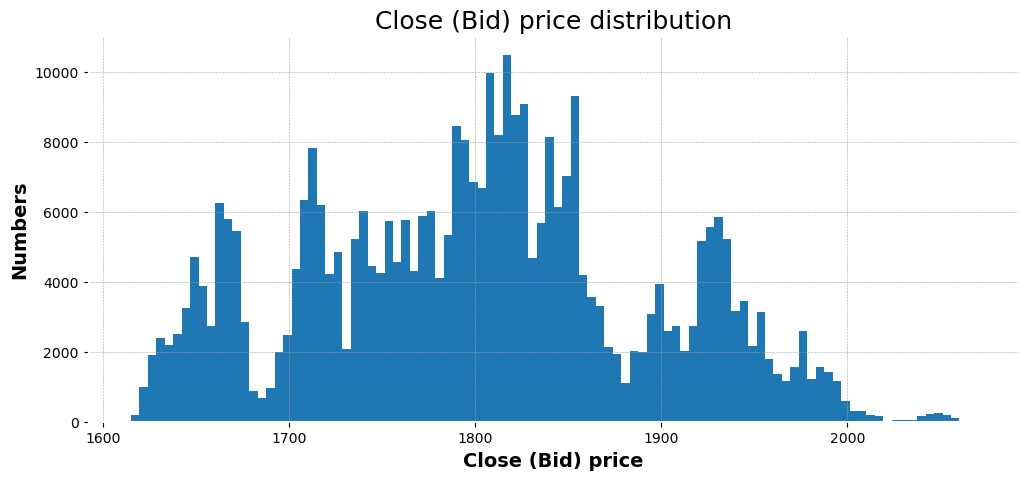

In [40]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Close_Bid'],bins=100)
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Close (Bid) price',size=14)
plt.show()

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>


______________________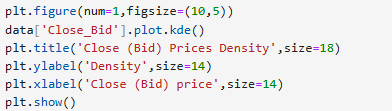

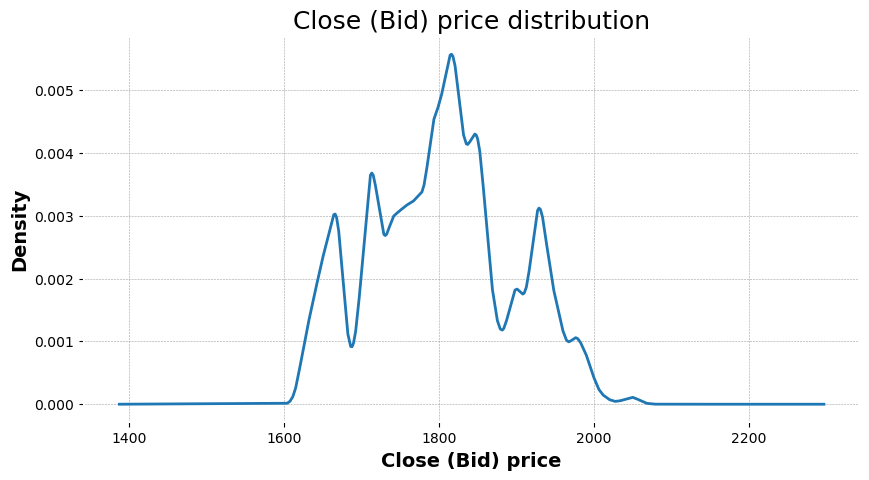

In [41]:
plt.figure(num=1,figsize=(10,5))
data['Close_Bid'].plot.kde()
plt.title('Close (Bid) price distribution',size=18)
plt.ylabel('Density',size=14)
plt.xlabel('Close (Bid) price',size=14)
plt.show()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

<Figure size 1200x500 with 0 Axes>

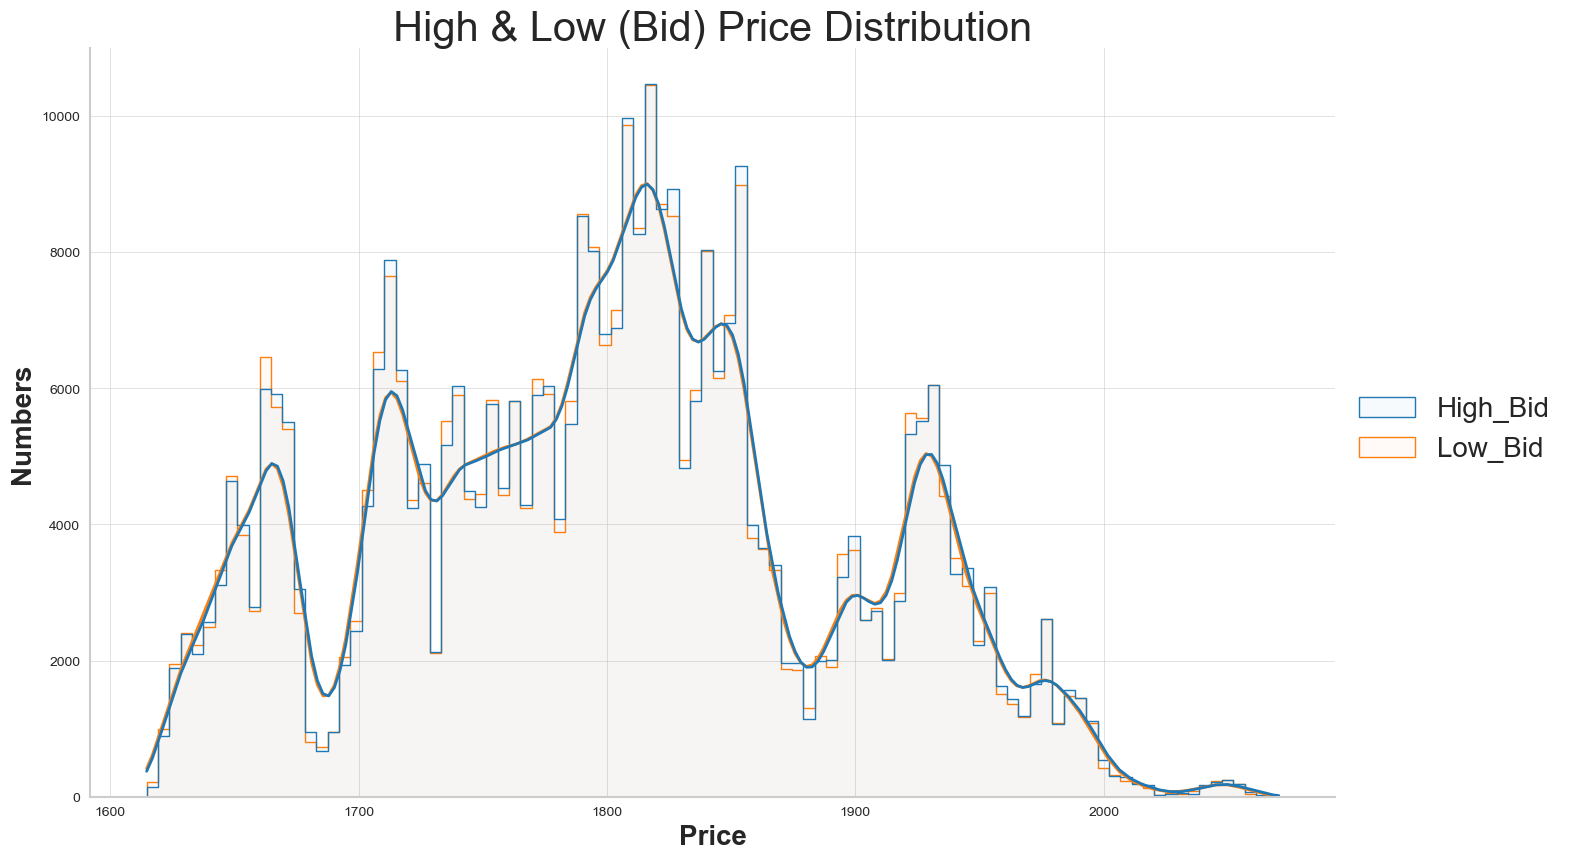

In [42]:
fig = plt.figure(figsize=(12, 5))
plt.rc('axes', titlesize= 30 ) 
sns.set_style('whitegrid')
sns.set_context(rc={'legend.fontsize': 20.0}) 

sns.displot( 
            data[['High_Bid', 'Low_Bid']],
            height=8,
            aspect=1.7,
            #hue="species", 
            kde=True,
            element="step",
            bins=100,
            alpha=0.03,          
                        
)

plt.title('High & Low (Bid) Price Distribution')
plt.xlabel('Price', size= 20)
#plt.ylabel('count (%)')
plt.ylabel('Numbers', size= 20)
plt.show()

__________________________________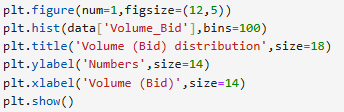

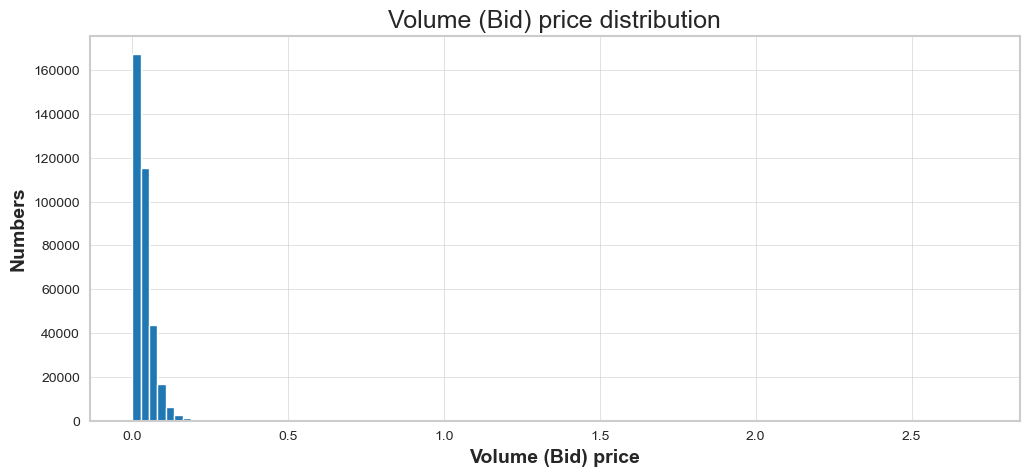

In [43]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Bid'],bins=100)
plt.title('Volume (Bid) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Bid) price',size=14)
plt.show()

_____________________________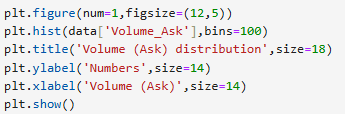

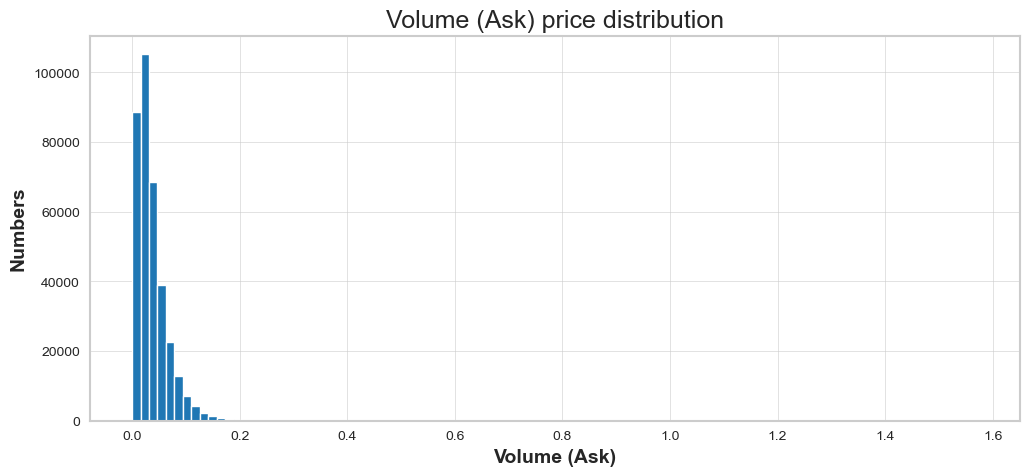

In [44]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Ask'],bins=100)
plt.title('Volume (Ask) price distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume (Ask)',size=14)
plt.show()

In [45]:
# Pay attention that large Bid volumes are larger than large Ask volumes.
# That is, trades are more significant when falling. This is a typical situation in financial markets.

<html> <h3 style="color:blue;"> Print the thin long tail of the volume(Bid and Ask) histograms. </h3> </html>

_________________________________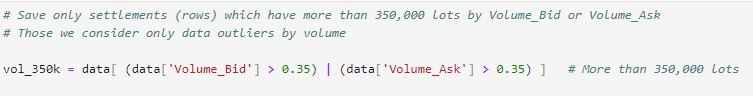

In [46]:
vol_350k = data[ (data['Volume_Bid'] > 0.35) | (data['Volume_Ask'] > 0.35) ]

____________________________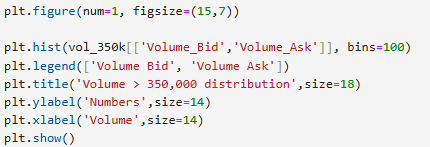

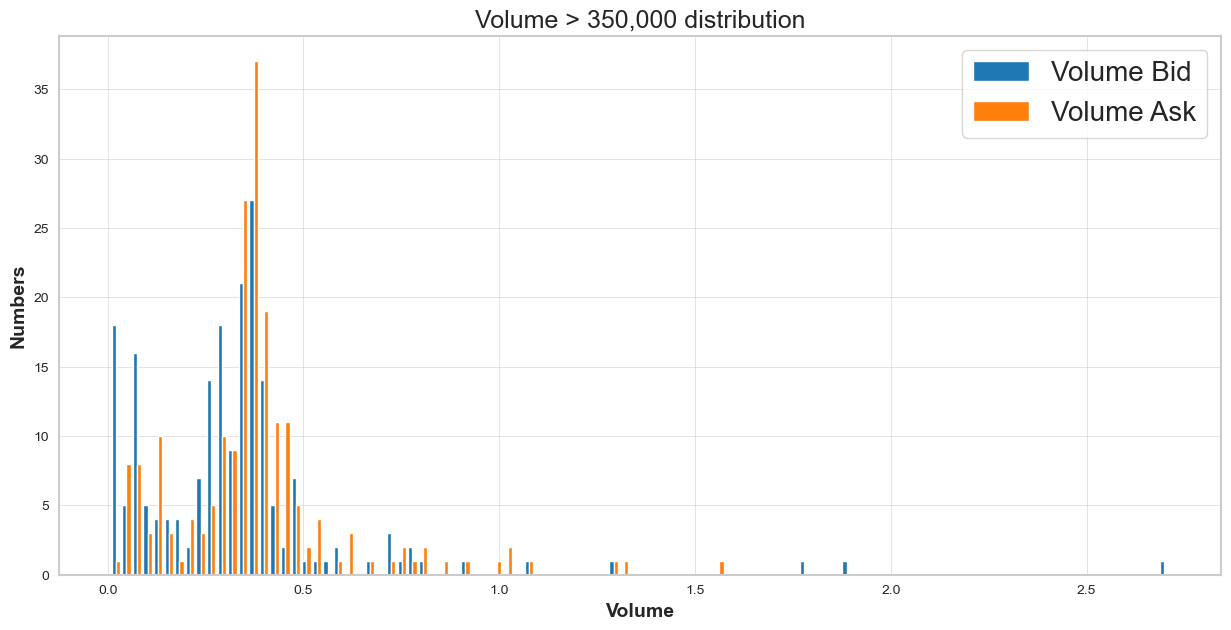

In [47]:
plt.figure(num=1,figsize=(15,7))

plt.hist(vol_350k[['Volume_Bid','Volume_Ask']],bins=100)
plt.legend(['Volume Bid', 'Volume Ask'])
plt.title('Volume > 350,000 distribution',size=18)
plt.ylabel('Numbers',size=14)
plt.xlabel('Volume',size=14)
plt.show()

____________________________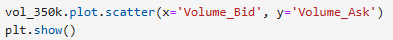

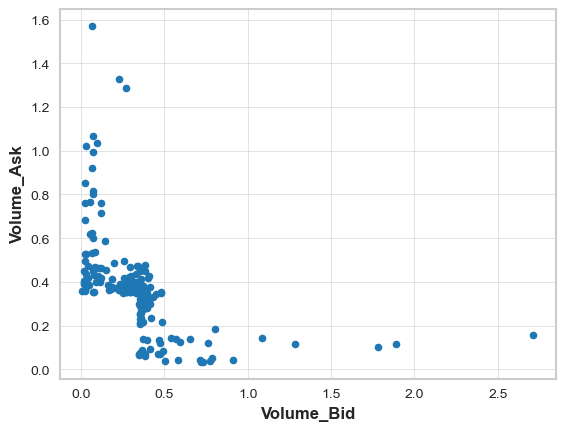

In [52]:
vol_350k.plot.scatter(x='Volume_Bid', y='Volume_Ask')
plt.show()

In [49]:
# The same Distribution but with another style

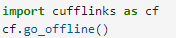

In [53]:
import cufflinks as cf
cf.go_offline()

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [54]:
vol_350k[['Volume_Ask', 'Volume_Bid']].iplot(
                            kind='hist',
                            histnorm='percent',
                            barmode='overlay',
                            xTitle='Volume > 350,000 distribution',
                            yTitle='Numbers',
                            title='Volume')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'color' property of histogram.marker
        Received value: 'rgba(255, 153, 51, np.float64(1.0))'

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to histogram.marker.colorscale
      - A list or array of any of the above

In [ ]:
# ! Click "Export to plot.ly" in the lower right corner

<html> <h4 style="color:blue;"> To speed up writing the code in the following few cells that plot graphs, you can copy and then slightly modify the code from the previous cells. </h4> </html>

_______________________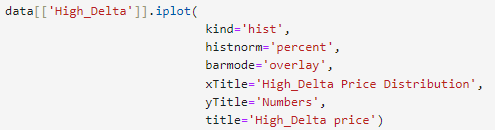

In [ ]:
data[['High_Delta']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='High_Delta Price Distribution',
    yTitle='Numbers',
    title='High_Delta price')

In [ ]:
# ! Click "Export to plot.ly" in the lower right corner

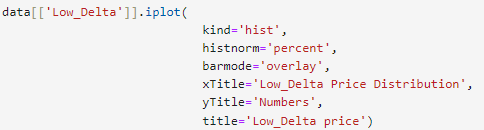

In [ ]:
# ! Click "Export to plot.ly" in the lower right corner

_________________________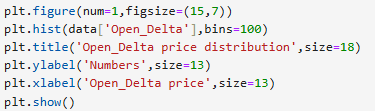

In [ ]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Open_Delta'],bins=100)
plt.title('Open_Delta price distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Open_Delta price',size=13)
plt.show()

_____________________________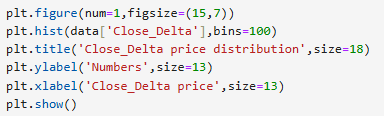

In [ ]:
plt.figure(num=1,figsize=(15,7))
plt.hist(data['Close_Delta'],bins=100)
plt.title('Close_Delta price distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Close_Delta price',size=13)
plt.show()

In [ ]:
# Pay attention to the difference in the Delta distributions above !
# Close_Delta price could be significantly higher than other Delta prices,
# It means, that at the end of the trading day, we have a big spread that can destroy potential profit,
# if you do not close the position in advance of the end of the trading day

____________________________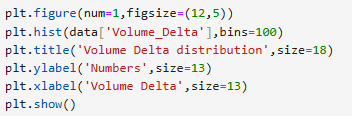

In [ ]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Delta'],bins=100)
plt.title('Volume Delta price distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume_Delta price',size=13)
plt.show()

_________________________________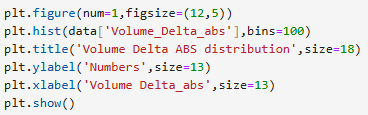

In [ ]:
plt.figure(num=1,figsize=(12,5))
plt.hist(data['Volume_Delta_abs'],bins=100)
plt.title('Volume Delta ABS distribution',size=18)
plt.ylabel('Numbers',size=13)
plt.xlabel('Volume Delta_abs',size=13)
plt.show()

_____________________________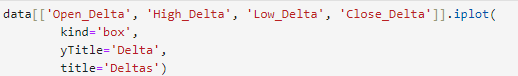

In [ ]:
data[['Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta']].iplot(
    kind='box',
    yTitle='Delta',
    title='Deltas')

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# plot the part of the whole dataset using iplot()
# The time period equals 400 minutes: from 19800 to 20200

data.iloc[19800:20200,:][['High_Bid', 'Low_Bid', 'Local_time_T', 'Volume_Ask','Volume_Bid']].iplot(
                                                x='Local_time_T', y=['High_Bid', 'Low_Bid'], 
                                                mode='lines+markers', 
                                                xTitle='Date', yTitle='Price',
                                                title='GOLD ')

In [ ]:
# ! Click "Export to plot.ly" in the lower right corner

<html> <h3 style="font-style:italic; color:blue;"> Indicate starts of days and weeks </h3> </html>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Create a new time column by moving it down one row

data['Local_time_T_shipt_1_Down'] = data['Local_time_T'].shift(1)

____________________________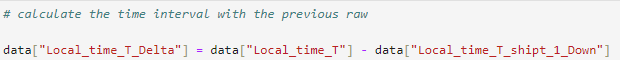

In [ ]:
data["Local_time_T_Delta"] = data["Local_time_T"] - data["Local_time_T_shipt_1_Down"]

_______________________________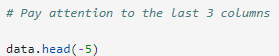

In [ ]:
data.head(-5)

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# The start of the year is the start of a week
# Therefore, we change the time interval to 2 days (the duration of the weekend).

data.loc[data.index[0], 'Local_time_T_Delta'] = "2 days 01:01:00"
data['Local_time_T_Delta'].iloc[0]

____________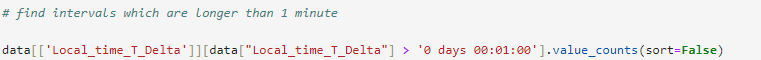

In [ ]:
data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:01:00'].value_counts(sort=False)

In [ ]:
# We found the duration of night intervals when there is no trading in Gold.
# Total such intervals - 258, which is equal to the number of trading days in 2022 year

_______________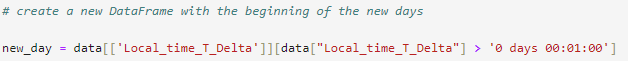

In [ ]:
new_day = data[['Local_time_T_Delta']][data["Local_time_T_Delta"] > '0 days 00:01:00']

_________________

_____________________________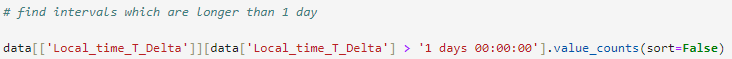

In [ ]:
# We found the weekend and holidays duration when there was no trading in Gold.
# Total intervals - 52, which is equal to the number of weekends in the 2022 year

____________________________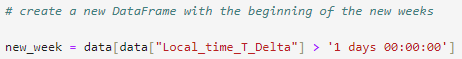

_______________________

____________________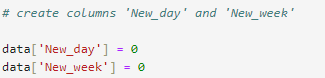

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Fill in "1" in the starts of day column

data.loc[data["Local_time_T_Delta"] > '0 days 00:01:00', 'New_day'] = 1

_________________________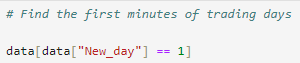

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Fill in "1s" in the starts of week column

data.loc[data["Local_time_T_Delta"] >'1 days 00:00:00', 'New_week'] = 1

__________________________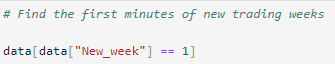

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# drop the columns that are no longer needed, 
# since the time series is regular 
# (each line is the next minute, except for the marked lines in the New_day and New_week columns

data2 = data.drop(['Local_time_T', 'Local_time_T_shipt_1_Down', 'Local_time_T_Delta'],axis=1)

_________________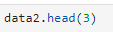

_______________

<html> <h3 style="font-style:italic; color:blue;"> Create Outputs (vector of answers) </h3> </html>


- we will predict 'High_Bid' and 'Low_Ask'
since we are interested in the maximum and minimum prices of the next minute at which we can
 - sell at the maximum price (High_Bid) or 
 - buy at the minimum price (Low_Ask = Low_Bid + Low_Delta)


____________________________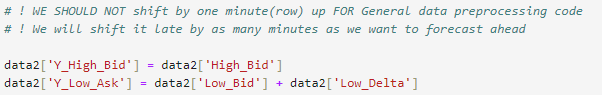

_______________________

<html> <h2 style="font-style:italic; color:blue;"> Data Normalisation </h2> </html>

Note:
A typical mistake when choosing a part of the data and time for scaling is to scale the entire dataset before it is divided into test and training data. It is a mistake because scaling starts the calculation of statistics, that is, minima/maxima of variables. When realizing time series forecasting in real life, at the time of their generation, you cannot have information from future observations. Therefore, statistics should be calculated on the training data, and then the result obtained will be applied to the test data. To take information “from the future” to generate predictions (that is, from a test sample), the model will produce forecasts with “system bias

In [ ]:
# normalisation
# data=(data-data.min())/(data.max()-data.min())

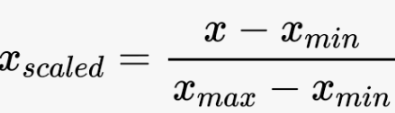

#### Create the TRAIN dataset to find Min and Max ​​for normalisation

##### Train / Validation / Test Split
- ~80% for training
- ~10% for validation
- ~10% for testing

In [ ]:
# here we divide only the training set(80%) for the calculation of normalisation parameters
# The division into validation and training sets will be done immediately before training

______________________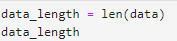

_____________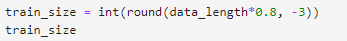

_______________________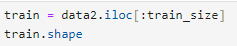

______________________

<html> <h4 style="font-style:italic; color:blue;"> Find Max and Min for Prices, Volumes and Deltas </h4> </html>

In [ ]:
# Max price is Max High_Ask = High_Bid + High_Delta
# Min price is Min Low_Bid

# Max Volume = Max{Volume_Bid, Volume_Ask}
# Min Volume = 0

# Max_Delta = Max{Open_Delta, High_Delta, Low_Delta, Close_Delta}
# Min_Delta = Min{Open_Delta, High_Delta, Low_Delta, Close_Delta}

_________________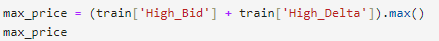

_______________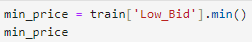

_____________________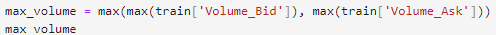

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
max_Delta = max(max(train['Open_Delta']), max(train['High_Delta']), max(train['Low_Delta']), max(train['Close_Delta']))
max_Delta

______________________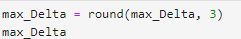

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
min_Delta = min(min(train['Open_Delta']), min(train['High_Delta']), min(train['Low_Delta']), min(train['Close_Delta']))
min_Delta

________________________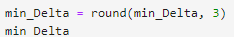

_____________________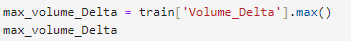

__________________________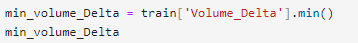

__________________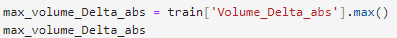

________________________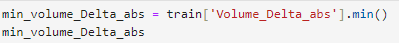

In [ ]:
# min_volume_Delta_abs = 0
# Therefore, the normalisation formula for volume_Delta_abs is simplified

<html> <h4 style="font-style:italic; color:blue;"> Normalise </h4> </html>
Run each cell only one time !


#### Now just press 'CTRL' and 'ENTER' keys on the next 5 cells with code.

In [ ]:
data2['Open_Bid'] = ( data2['Open_Bid'] - min_price ) / (max_price-min_price)
data2['High_Bid']  = ( data2['High_Bid']  - min_price ) / (max_price-min_price)
data2['Low_Bid']   = ( data2['Low_Bid']   - min_price ) / (max_price-min_price)
data2['Close_Bid'] = ( data2['Close_Bid'] - min_price ) / (max_price-min_price)
data2['Y_High_Bid'] = ( data2['Y_High_Bid'] - min_price ) / (max_price-min_price)
data2['Y_Low_Ask']  = ( data2['Y_Low_Ask']  - min_price ) / (max_price-min_price)


In [ ]:
data2['Volume_Ask']  = data2['Volume_Ask'] / max_volume
data2['Volume_Bid']  = data2['Volume_Bid'] / max_volume

In [ ]:
data2['Volume_Delta'] = ( data2['Volume_Delta'] - min_volume_Delta ) / (max_volume_Delta-min_volume_Delta)

In [ ]:
data2['Volume_Delta_abs']  = data2['Volume_Delta_abs'] / max_volume_Delta_abs

In [ ]:
# For the price deltas, the minimum difference is more interesting, therefore we apply inverse normalisation
# data= 1 - (data - data.min()) / (data.max() - data.min()) = (data.max() - data) / (data.max() - data.min())

In [ ]:
data2['Open_Delta']  = ( max_Delta - data2['Open_Delta'] )  / (max_Delta-min_Delta)
data2['High_Delta']  = ( max_Delta - data2['High_Delta'] )  / (max_Delta-min_Delta)
data2['Low_Delta']   = ( max_Delta - data2['Low_Delta'] )   / (max_Delta-min_Delta)
data2['Close_Delta'] = ( max_Delta - data2['Close_Delta'] ) / (max_Delta-min_Delta)

________________________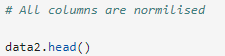

_____________________________

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# memory size reduction

columns_float =['Open_Bid', 'High_Bid', 'Low_Bid', 'Close_Bid', 
                'Volume_Bid', 'Volume_Ask', 'Volume_Delta', 'Volume_Delta_abs', 
                'Open_Delta', 'High_Delta', 'Low_Delta', 'Close_Delta',
                'Y_High_Bid', 'Y_Low_Ask']

columns_integer =['New_day', 'New_week']



__________________________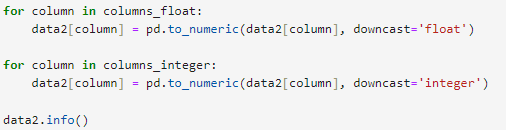

## <font color='green'>Save final dataset to file !</font>

#### Now just press 'CTRL' and 'ENTER' keys on the next cell.

In [ ]:
# Do it once!
# Writing a normalised dataset to disk in file GOLD_2020_normilised.csv

file_obj1 = open('GOLD_2022_normalised.csv', 'w')
data2.to_csv('GOLD_2022_normalised.csv', encoding='utf-8', index=False)
file_obj1.close()

# Lab Logbook Requirement:

<html> <h3 style="font-style:italic; color:blue;">
   
1) Plot the price chart of the part of the whole dataset 'High_Bid' and 'Low_Bid' prices using iplot() library.
2) The start point should equal the 5 last digits of your SID Number.
3) The time period (in minutes) should equal the 3 last digits of your SID Number.
4) Please only add a print-screen of the required code and final graph to your Lab Logbook.
</h3> </html>

<html> <h3 style="color:red;">
NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK, AND UPLOAD THE LAB LOGBOOK REQUIREMENTS AS A SCREENSHOT OF YOUR CODE AND RESULT(S) ON YOUR GITHUB.
</h3> </html>